In [1]:
# import libraries

import pandas as pd 
import numpy as np

In [4]:
import pickle
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

np.random.seed(42)

print("Libraries imported successfully.")


Libraries imported successfully.


In [3]:
import sys
print(sys.executable)

c:\Users\Ayan Computer\miniconda3\envs\ml_project\python.exe


In [7]:
# load the dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

print("Dataset loaded successfully.")
print(f"Features shape: {X.shape}, \nTarget shape: {y.shape}")
print("\nDataset description:")
print(housing.DESCR)
# print(housing.DESCR[:500] + "....")  # Print first 500 characters of the description

Dataset loaded successfully.
Features shape: (20640, 8), 
Target shape: (20640,)

Dataset description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of tho

In [8]:
# display basic information about the dataset
print("\nBasic Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable: {y.name}")
# display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(X.head())
# display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(X.describe())
# features names
print("\nFeature names:")   
print(X.columns.tolist())


Basic Information:
Number of samples: 20640
Number of features: 8
Target variable: MedHouseVal

First few rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Summary statistics of the dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173     

# Data Exploration and Visualization

We will explore the California housing dataset using various visualizations to understand the relationships between features and the target variable (median house value).

we will make the following visualizations:
1. **Correlation Heatmap**: Visualize the correlation between features and the target variable.

2. **Distribution of Target**: Show the distribution of the target variable (median house value).

3. **Scatter Plots**: Visualize the relationship between a few important features and the target variable.

4. **Boxplot**: Check for outliers in the features.


In [9]:
print("Missing values in features:")
print(X.isnull().sum())
print("\nMissing values in target:")
print(y.isnull().sum())

Missing values in features:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

Missing values in target:
0


In [10]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [11]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [12]:
feature_names = housing.feature_names

# Convert X and y to a DataFrame for easier plotting
X_df = pd.DataFrame(X, columns=feature_names)
X_df['Target'] = y

## *1. Correlation Heatmap (features + target)*

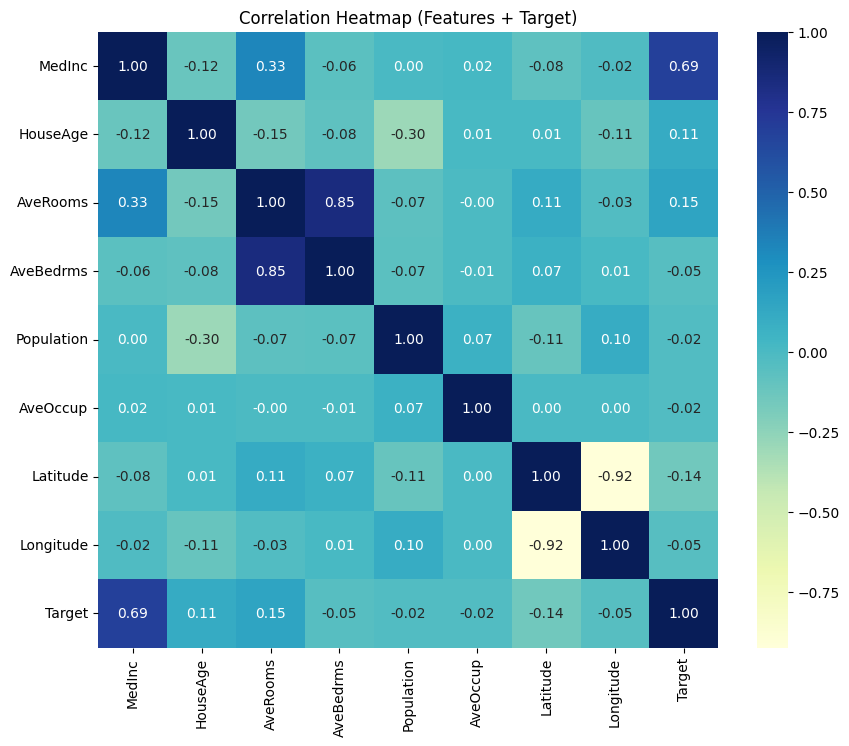

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap (Features + Target)")
plt.show()

## *2. Distribution of Target (Median House Value)*

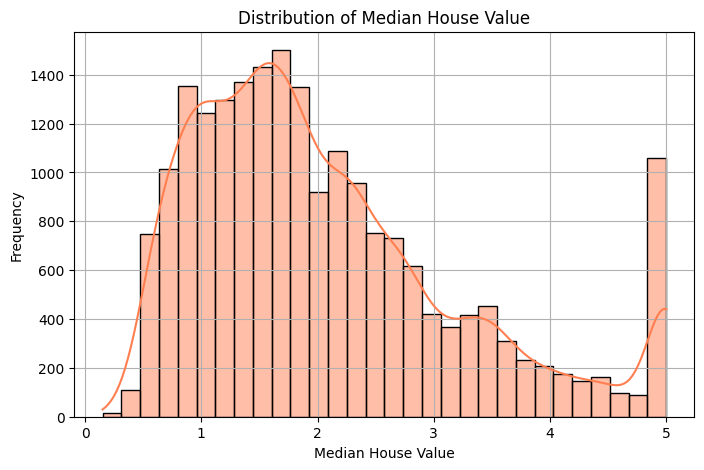

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='coral')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **3. Scatter plots of a few features vs target**

<Figure size 1000x600 with 0 Axes>

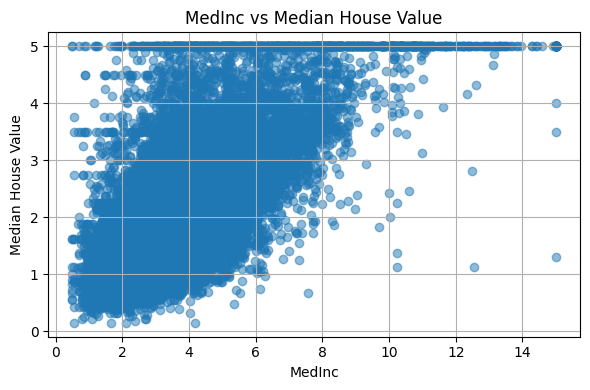

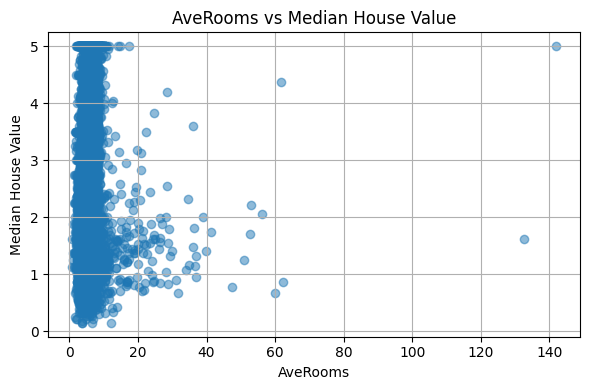

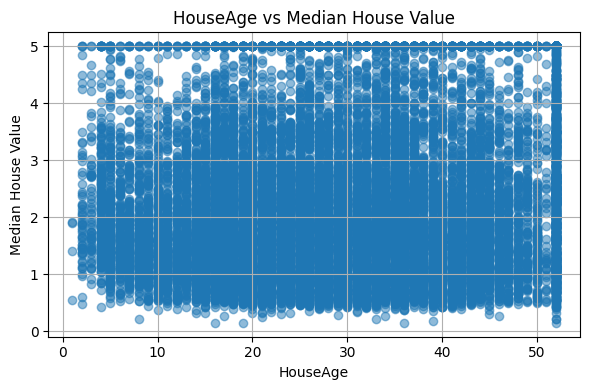

In [15]:
plt.figure(figsize=(10, 6))
important_features = ['MedInc', 'AveRooms', 'HouseAge']
for feature in important_features:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_df[feature], y, alpha=0.5)
    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# *4. Boxplot to check for outliers*

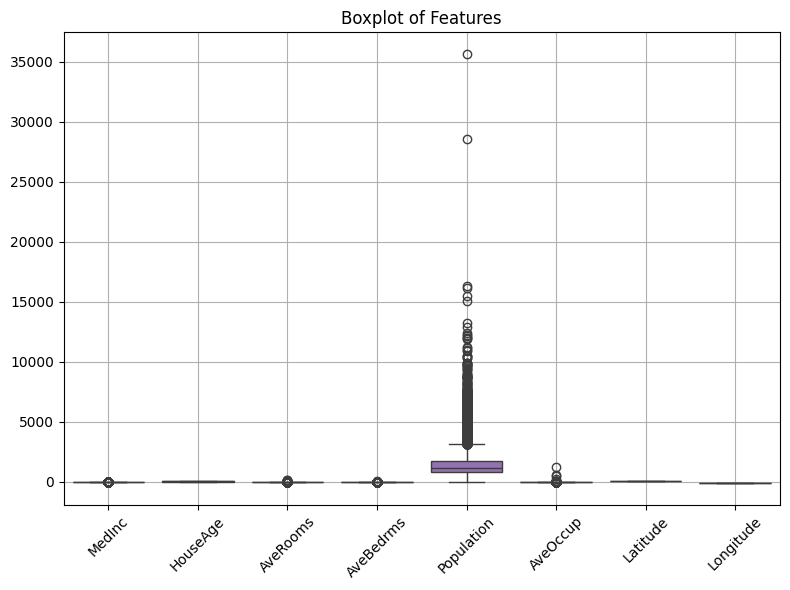

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=X_df[feature_names])
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.grid(True)
plt.tight_layout()
plt.show()

Insights that we can draw from these visualizations:
we saw that:
- The correlation heatmap shows that `MedInc` has a strong positive correlation with the target variable, indicating that higher income areas tend to have higher house values.

- The distribution of the target variable is right-skewed, suggesting that most houses are priced lower, with fewer high-value houses.

- The scatter plots reveal that `MedInc`, `AveRooms`, and `HouseAge` have a positive relationship with the target variable, meaning that as these features increase, the median house value tends to increase as well.

- The boxplot indicates the presence of outliers in Population and AveOccup, which may need further investigation or handling in the modeling process.

## Training and Testing Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization of Features

In [ ]:
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train the Model

In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## *Make Predictions*

In [22]:
y_pred = model.predict(X_test_scaled)

## *Evaluate model*